##### Linear Regression With Multiple Variables:
Now will train a linear regression model with multiple variables

In [19]:
import torch
from torch import nn, optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [20]:
# loading data
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target']= pd.Series(boston.target)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [21]:
df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [22]:
# splitting data into training and test set
df_train, df_test = train_test_split(df, test_size = 0.2)
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df_train_feature = df_train.iloc[:,0:-1]
df_train_target = df_train.iloc[:,-1]

In [23]:
# feature normalization
feature_mean = df_train_feature.mean()
feature_std = df_train_feature.std()
X_train = ((df_train_feature-feature_mean)/feature_std).values
y_train = df_train_target.values

In [24]:
# defining model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        y = self.linear(x)
        return y

alpha = 0.01 # learning rate
model = LinearRegressionModel(X_train.shape[1],1)
loss_func = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), alpha)

In [25]:
# training loop
epochs = 1000
losses = np.zeros(epochs)

for epoch in range(epochs):
    x = Variable(torch.from_numpy(X_train)).float()
    y = Variable(torch.from_numpy(y_train)).float().view(-1,1)
    
    optimizer.zero_grad()
    
    y_ = model.forward(x)
    loss = loss_func(y_,y)
    loss.backward()
    optimizer.step()
    
    losses[epoch] = loss.item()


<IPython.core.display.Javascript object>


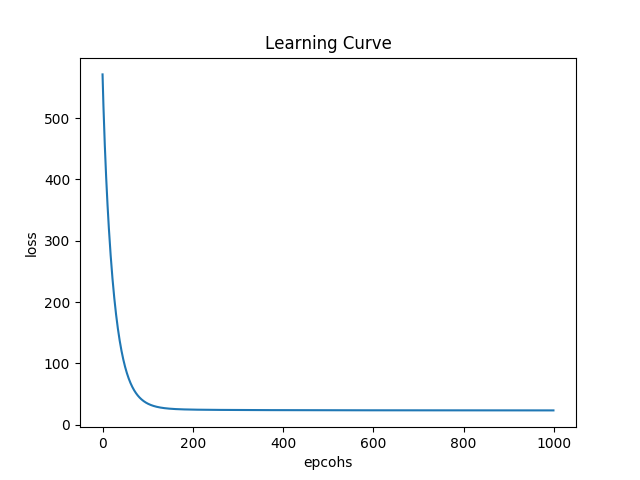

In [26]:
%matplotlib notebook
fig = plt.figure("Learning Curve")
plt.plot(np.arange(epochs),losses)
plt.title("Learning Curve")
plt.xlabel("epcohs")
plt.ylabel("loss")
plt.show()

In [27]:
# test accuracy (MSE): lower is better
X_test = ((df_test.iloc[:,0:-1]-feature_mean)/feature_std).values
y_test = df_test.iloc[:,-1].values

y_ = model.forward(Variable(torch.from_numpy(X_test)).float()).detach().numpy()
print("Mean Square Error on the test set: {}".format(mean_squared_error(y_test,y_)))

Mean Square Error on the test set: 17.304537970104487
